# Ridge Regression (interpretation)

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of Ridge Regression from sklearn to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use the implementation above to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

## Libraries, same old dance

In [ ]:
import sklearn
import pandas as pd
import numpy as np

## Polynomial regression, revisited

We call back on the material from the previous Lab (*lab-3.ipynb*), where we wrote the function to produce an DataFrame with columns containing the powers of a given input. Copy and paste the function `polynomial_dataframe` from there:

In [ ]:
def polynomial_dataframe(feature, degree):
    data = pd.DataFrame()

    for i in range(1, degree + 1):
      label = 'power_' + str(i)
      data[label] = feature ** i
    return data

In [ ]:
mock = np.array([1., 2., 3.])
print(polynomial_dataframe(mock, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
full_data = pd.read_csv(r"/content/drive/MyDrive/FUNIX Progress/MLP302x_1.1-A_EN/data/kc_house_data.csv", index_col=0)

As in the previous lab, we will use the 'sqft_living' variable. For plotting purposes (connecting the dots), you'll need to sort by the values of 'sqft_living'. For houses with identical square footage, we break the tie by their prices.

In [ ]:
full_data = full_data.sort_values(['sqft_living', 'price'])

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_dataframe()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [ ]:
l2_small_penalty = 1e-5

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable.  (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights. You can consult [sklearn's Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

Also, it is in our best interest to normalize the values to Gaussian distribution via [sklearn's StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), as we know penalty values regulate the magnitude of weights, which is inversely propotional to the polynomial (and thus very large) values.

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
# Handholding level: Moderate
scaler = StandardScaler()
poly_data = polynomial_dataframe(full_data['sqft_living'], 15)
poly_features = scaler.fit_transform(poly_data.values)
# continues by yourself.
poly_label = full_data['price'].values
rigde_model = Ridge(alpha = l2_small_penalty).fit(poly_features, poly_label)

***QUIZ QUESTION:  What's the learned value for the coefficient of feature `power_1`?***

In [ ]:
rigde_model.coef_

array([  66302.88611122,   69629.18248654,  318517.57918026,
       -214032.491538  ,  -11942.64888294,    -785.01485673,
         -2425.65579973,    1844.69134914,   -1112.58390264,
         -1300.13430765,    1164.71408109,    3544.54416876,
          2157.26004229,   -2039.47889013,     347.69928627])

# Observe overfitting

Recall from the last lab that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did.

First, split the data into split the sales data into four subsets of roughly equal size and call them `set_1`, `set_2`, `set_3`, and `set_4`. Use `train_test_split` function and make sure you set `random_state=0`. 

In [ ]:
from sklearn.model_selection import train_test_split
seed = 20
big_set_1, big_set_2 = train_test_split(full_data, train_size=0.5, test_size=0.5, random_state=0)
set_1, set_2 = train_test_split(big_set_1, train_size=0.5, test_size=0.5, random_state=0)
set_3, set_4 = train_test_split(big_set_2, train_size=0.5, test_size=0.5, random_state=0)

In [ ]:
set_1 = set_1.sort_values(['sqft_living', 'price'])
set_2 = set_2.sort_values(['sqft_living', 'price'])
set_3 = set_3.sort_values(['sqft_living', 'price'])
set_4 = set_4.sort_values(['sqft_living', 'price'])

Next, fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

In [ ]:
# We are fitting using LinearRegression.
poly15_set_1 = polynomial_dataframe(set_1['sqft_living'], 15)
poly15_set_2 = polynomial_dataframe(set_2['sqft_living'], 15)
poly15_set_3 = polynomial_dataframe(set_3['sqft_living'], 15)
poly15_set_4 = polynomial_dataframe(set_4['sqft_living'], 15)

features_poly1 = poly15_set_1.values
features_poly2 = poly15_set_2.values
features_poly3 = poly15_set_3.values
features_poly4 = poly15_set_4.values

poly15_set_1['price'] = set_1['price']
poly15_set_2['price'] = set_2['price']
poly15_set_3['price'] = set_3['price']
poly15_set_4['price'] = set_4['price']

labels_set_1 = poly15_set_1['price'].values
labels_set_2 = poly15_set_2['price'].values
labels_set_3 = poly15_set_3['price'].values
labels_set_4 = poly15_set_4['price'].values

model_set_1 = LinearRegression().fit(features_poly1, labels_set_1)
model_set_2 = LinearRegression().fit(features_poly2, labels_set_2)
model_set_3 = LinearRegression().fit(features_poly3, labels_set_3)
model_set_4 = LinearRegression().fit(features_poly4, labels_set_4)

In [ ]:
# You might be able to copy from the previous lab
print(model_set_1.coef_)
print()
print(model_set_2.coef_)
print()
print(model_set_3.coef_)
print()
print(model_set_4.coef_)
print()

[ 1.55190598e-05  3.30605415e-02  9.04167288e-06 -8.92008290e-10
 -2.10716861e-14 -2.08166817e-17 -1.01242799e-15  1.04950770e-15
  8.54351312e-17 -1.02261949e-15  1.85181731e-16 -5.80481843e-16
  1.33573708e-16 -4.30970364e-16  8.81239526e-16]

[ 2.68607438e-05  5.28720651e-02  3.52067466e-07 -1.46404518e-10
 -9.04484820e-15  1.94289029e-16 -4.89192020e-16  1.12757026e-16
 -2.93168267e-16  4.47558657e-16 -6.62230687e-16  7.66747776e-16
  6.62664368e-16  2.32452946e-16 -3.26128013e-16]

[ 1.64156061e-05  4.07138735e-02  5.92167213e-06 -5.57871166e-10
 -5.47010354e-14 -6.45317133e-16 -1.73472348e-17  9.51929507e-17
 -6.85215773e-16  3.24393290e-16  5.54244151e-16  1.72951931e-15
  2.45897053e-16 -6.40112963e-16 -7.77156117e-16]

[ 3.43180776e-05  7.53137079e-02 -9.56024947e-06  8.27471889e-10
  1.71078429e-14 -1.38777878e-16 -3.10515502e-16  1.40078921e-16
  1.65666092e-16 -8.91647867e-16  6.62664368e-16  9.77950360e-16
  1.15879528e-15 -6.80011603e-16  4.71844785e-16]



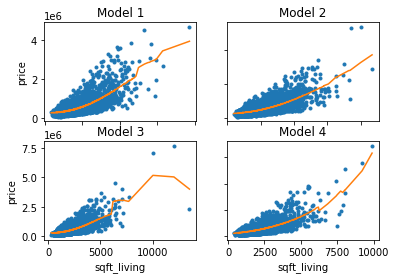

In [ ]:
# Copy
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
        poly15_set_1['power_1'], model_set_1.predict(features_poly1),'-')
axs[0, 0].set_title('Model 1')

axs[0, 1].plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
        poly15_set_2['power_1'], model_set_2.predict(features_poly2),'-')
axs[0, 1].set_title('Model 2')

axs[1, 0].plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
        poly15_set_3['power_1'], model_set_3.predict(features_poly3),'-')
axs[1, 0].set_title('Model 3')

axs[1, 1].plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
        poly15_set_4['power_1'], model_set_4.predict(features_poly4),'-')
axs[1, 1].set_title('Model 4')

for ax in axs.flat:
    ax.set(xlabel='sqft_living', ylabel='price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# Wait, don't forget the quiz below.

The four curves should differ from one another a lot, as should the coefficients you learned.

***QUIZ QUESTION:  For the models learned in each of these training sets, what are the smallest and largest absolute values you learned for the coefficient of feature `power_1`?***

In [ ]:
print(min(abs(model_set_1.coef_[0]), 
          abs(model_set_2.coef_[0]), 
          abs(model_set_3.coef_[0]), 
          abs(model_set_4.coef_[0])),
      max(abs(model_set_1.coef_[0]), 
          abs(model_set_2.coef_[0]), 
          abs(model_set_3.coef_[0]), 
          abs(model_set_4.coef_[0])))

1.5519059838001716e-05 3.431807755662084e-05


# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=1e3`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty`, the code <u>should be the same</u> as the experiment above.

In [ ]:
l2_penalty=1e3

rigde_set_1 = Ridge(alpha = l2_small_penalty).fit(features_poly1, labels_set_1)
rigde_set_2 = Ridge(alpha = l2_small_penalty).fit(features_poly2, labels_set_2)
rigde_set_3 = Ridge(alpha = l2_small_penalty).fit(features_poly3, labels_set_3)
rigde_set_4 = Ridge(alpha = l2_small_penalty).fit(features_poly4, labels_set_4)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.85768e-35): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.41507e-35): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.143e-34): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.48952e-35): result may not be accurate.
  overwrite_a=True).T


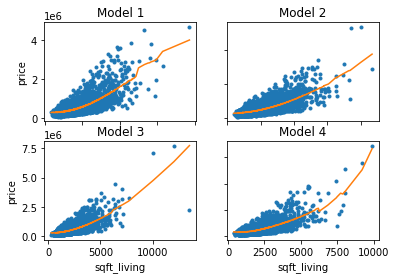

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
        poly15_set_1['power_1'], rigde_set_1.predict(features_poly1),'-')
axs[0, 0].set_title('Model 1')

axs[0, 1].plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
        poly15_set_2['power_1'], rigde_set_2.predict(features_poly2),'-')
axs[0, 1].set_title('Model 2')

axs[1, 0].plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
        poly15_set_3['power_1'], rigde_set_2.predict(features_poly3),'-')
axs[1, 0].set_title('Model 3')

axs[1, 1].plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
        poly15_set_4['power_1'], rigde_set_4.predict(features_poly4),'-')
axs[1, 1].set_title('Model 4')

for ax in axs.flat:
    ax.set(xlabel='sqft_living', ylabel='price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

These curves should vary less, now that you applied a high degree of regularization.

***QUIZ QUESTION:  For the models learned with the high level of regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?*** (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [ ]:
print(min(model_set_1.coef_[0], 
          model_set_2.coef_[0], 
          model_set_3.coef_[0], 
          model_set_4.coef_[0]),
      max(model_set_1.coef_[0], 
          model_set_2.coef_[0], 
          model_set_3.coef_[0], 
          model_set_4.coef_[0]))

1.5519059838001716e-05 3.431807755662084e-05


## Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evaluate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evaluate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evaluate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. Sklearn already have a shuffling function, so we use that.

In [ ]:
train_and_validation, test_data = train_test_split(full_data, train_size=0.9, test_size=0.1, random_state=1)
train_and_validation = sklearn.utils.shuffle(train_and_validation, random_state=1)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [ ]:
n = len(train_and_validation)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)//k
    end = (n*(i+1))//k-1
    print(i, (start, end))

0 (0, 1944)
1 (1945, 3889)
2 (3890, 5834)
3 (5835, 7779)
4 (7780, 9724)
5 (9725, 11669)
6 (11670, 13614)
7 (13615, 15559)
8 (15560, 17504)
9 (17505, 19450)


One of the nice things about data library in general are their ability to accept slices. To extract a continuous slice from the DataFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_and_validation`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [ ]:
train_and_validation[0:10] # rows 0 to 9

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6123600285,20141107T000000,185000.0,3,1.50,1010,7755,1.0,0,0,3,6,1010,0,1953,0,98148,47.4238,-122.332,1270,8350
3323059027,20140528T000000,326000.0,3,2.75,1720,28000,1.0,0,0,4,7,1720,0,1958,0,98058,47.4375,-122.176,2000,41817
5316100920,20140725T000000,2250000.0,3,4.25,5150,7800,2.5,0,2,3,11,4170,980,1954,0,98112,47.6288,-122.282,4270,7800
4315700175,20140612T000000,440000.0,3,1.00,1210,5750,1.5,0,0,4,7,1210,0,1910,0,98136,47.5403,-122.391,1160,5000
303000445,20140523T000000,175000.0,2,1.00,1300,44431,1.0,0,0,5,6,1300,0,1958,0,98001,47.3270,-122.267,1470,14850
2130410050,20140513T000000,287000.0,3,2.25,1490,9600,1.0,0,0,4,7,1170,320,1987,0,98019,47.7378,-121.977,1590,10104
7972601885,20150430T000000,350000.0,5,1.75,1380,7620,1.0,0,0,3,7,1180,200,1955,0,98106,47.5279,-122.345,1990,7620
3362400511,20150304T000000,570000.0,3,1.75,1260,3328,1.0,0,0,5,6,700,560,1905,0,98103,47.6823,-122.349,1380,3536
7889600190,20150113T000000,229000.0,3,1.00,1590,6240,1.0,0,0,3,7,1060,530,1956,0,98146,47.4936,-122.337,1410,6240


Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the `train_and_validation` dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above.
Extract the fourth segment (segment 3) and assign it to a variable called `validation4`.

In [ ]:
start = (n * 3) // k
end = (n*(3+1))//k-1
validation4 = train_and_validation[start:end]

To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $544,330.

In [ ]:
print( round(validation4['price'].mean(), 0) )

545311.0


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. DataFrame has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `train_and_validation` dataframe.

In [ ]:
n = len(train_and_validation)
first_two = train_and_validation[0:2]
last_two = train_and_validation[n-2:n]
print(first_two.append(last_two))

                       date      price  ...  sqft_living15  sqft_lot15
id                                      ...                           
6123600285  20141107T000000   185000.0  ...           1270        8350
3323059027  20140528T000000   326000.0  ...           2000       41817
6151800612  20150107T000000   162000.0  ...           1460       16638
1088100450  20140725T000000  1720000.0  ...           3350       35857

[4 rows x 20 columns]


Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [ ]:
# time to use your brain. Where do the fourth segment start and end? What do .append do?
train4 = train_and_validation[0:start].append(train_and_validation[end + 1:n])

To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $540,120.

In [ ]:
print( round(train4['price'].mean(), 0) )

540120.0


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

Also, sklearn have an inbuilt `mean_squared_error` function.

In [ ]:
from sklearn.metrics import mean_squared_error

def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    # implement the function.
    n = len(data)
    mean_error = 0
    for i in range(k):
      start = (n * i) // k
      end = (n*(i+1)) // k-1

      validation = data[start:end+1]
      training = data[0:start].append(data[end+1:n])

      model = Ridge(alpha = l2_penalty).fit(training[features_list].values, training[output_name].values)

      mean_error += mean_squared_error(validation[output_name].values, model.predict(validation[features_list].values))
    return (mean_error / k)

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^0, 10^0.5, 10^1, 10^1.5, ..., 10^2] (to get this in Python, you can use this Numpy function: `np.logspace(0, 10, num=21)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_and_validation` when generating polynomial features!

If you are seeing two much reds from `scipy.linalg.solve`, import `warnings` and use `warnings.filterwarnings('ignore')`. Not best practice, but useful. Once you are done, set `warnings.resetwarnings()` to turn it back to normal.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
data = polynomial_dataframe(train_and_validation['sqft_living'], 15)

features = data.columns

data['price'] = train_and_validation['price']

k = 10

arr_errors = []
for l2_penalty in np.logspace(0, 10, num=21):
  arr_errors.append(k_fold_cross_validation(k, l2_penalty, data, 'price', features))

arr_errors

[65982812110.8018,
 65982812096.45726,
 65982812051.09352,
 65982811907.64232,
 65982811454.00891,
 65982810019.50185,
 65982805483.251015,
 65982791138.959335,
 65982745784.263145,
 65982602419.459274,
 65982149652.73147,
 65980723779.13802,
 65976272984.4811,
 65962756471.07845,
 65924926809.3904,
 65839673606.52682,
 65716806811.28749,
 65621019138.107285,
 65576295887.10587,
 65560158471.71129,
 65554837975.93262]

***QUIZ QUESTIONS:  What is the best value for the L2 penalty according to 10-fold validation?***

In [ ]:
best_l2_penalty = np.logspace(0, 10, num=21)[arr_errors.index(min(arr_errors))]
best_l2_penalty

10000000000.0

You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method. Also you can use `plt.xscale('log')` for an intuitive plot. [Quitter.](https://xkcd.com/1162/)

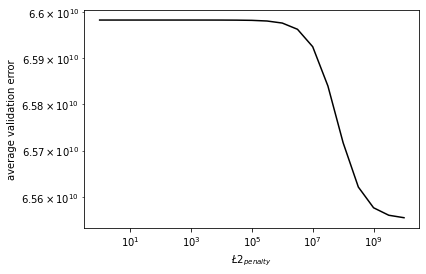

In [ ]:
# Plot the l2_penalty values(maybe in log) in the x axis and the cross-validation error in the y axis. 
plt.plot(np.logspace(0, 10, num=21), arr_errors, 'k-')
plt.xlabel('$\L2_{penalty}$')
plt.ylabel('average validation error')
plt.xscale('log')
plt.yscale('log')

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`. This way, your final model will be trained on the entire dataset.

***QUIZ QUESTION: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty? ***

In [ ]:
poly_data = polynomial_dataframe(train_and_validation['sqft_living'], 15)
features = data.columns

data['price'] = train_and_validation['price'] # add price to the data since it's the target

model_l2p_1000 = Ridge(alpha = best_l2_penalty).fit(poly_data, data['price'].values)

In [ ]:
predictions = model_l2p_1000.predict(polynomial_dataframe(test_data['sqft_living'], 15))
residuals = predictions - test_data['price'].values
residuals.dot(residuals)

139812500297123.23